## Решение ОДУ в Python

Важную роль в исследованиях играют обыкновенные дифференциальные уравнения (ОДУ).

Обычно их можно записать в следующем виде:
 $$
 y' = f(t,y)
 $$

$$
 y'' = f(t,y,y')
 $$

и аналогично для более высоких порядков.

Примеры из физики:

|Область науки| Уравнения и фамилии| Применения|
| :-: | :-: | :-: |
| Механика | уравнения Ньютона, уравнения Гамильтона и Лагранжа, уравнение Ланжевена |движение тела в поле сил; задача многих тел (космический аппарат, планеты, спутники, астероиды, кометы...) ; диффузия атомов и наночастиц по поверхности твердого тела |
| Электродинамика, физика высоких энергий, физика плазмы | сила Лоренца, тормозное излучение | заряженные частицы (электроны и ионы) в электромагнитном поле; поведение плазмы в токамаке; треки в детекторах частиц|
| Квантовая механика | временное уравнение Шрёдингера, уравнение фон Неймана (квантовое уравнение Лиувилля) | изменение состояния квантового объекта со временем, управление запутанностью кубитов (квантовые вычисления) |
| Лазерная физика | уравнения Блоха для двухуровневой среды, скоростные уравнения для концентраций | распространение излучения по оптическому волокну, волоконные и полупроводниковые лазеры, стабильность лазерных излучателей, порог генерации |
| Физика твердого тела| кинетическое уравнение Больцмана, двухтемпературная модель, уравнение Ландау-Лифшица, уравнение Гросса-Питаевского| Движение носителей тока в полупроводнике, поведение намагниченности ферромагнитных плёнок и наночастиц, динамика бозе-конденсата в магнитооптической ловушке |

Самая простая разновидность формулировки задачи с ОДУ - в варианте с начальным условием:

\begin{eqnarray}
y'=f(t,y)
\\
y(t_0)=y_0
\end{eqnarray}

Решение такой задачи даёт возможность предсказать состояние изучаемой системы в будущем $y(t>t_0)$, зная её состояние в некоторый заданный момент времени $y(t_0)$.

<i> Примечание:  правая часть $f(t,y)$ также может содержать случайное слагаемое, связываемое с тепловыми флуктуациями. Это так называемые стохастические уравнения. Естественно, в таком случае про точное предсказание речи нет - при каждом следующем решении ответ будет другой. Но тем не менее при решении будут видны правильные тенденции. 
Такие уравнения позволяют описать поведение изучаемых систем, когда неконтролируемое влияние внешнего окружения нельзя игнорировать: примеры - т.н. декогеренция кубитов и перемагничивание частиц в суперпарамагнетике.)</i>

##### Дополнительный материал: 
Также представляет интерес краевая задача, когда заданы значения функции на концах промежутков. 

Примеры:

* Уравнение теплопроводности даёт распределение тепла внутри пластины; 
*  Сопротивление материалов - стержень с различными силами на концах;
* Траектория космического аппарата, который должен финишировать на другой планете. 

Один из способов численного решения краевой задачи - т.н. метод стрельбы. Источник - Ильина, Силаев, том 2.




### Пример 1. Синус, решение ОДУ 1 порядка

\begin{eqnarray}
\begin{cases}
y' = \cos t
\\
y(0) = 0
\end{cases}
\end{eqnarray}

Как мы знаем, решением этого уравнения является синус.
Его легко получить, проинтегрировав уравнение:

$$y(t) = \int \limits_0^t y'(\tau) d\tau = \int \limits_0^t \cos \tau d \tau = \sin t$$

* Если правая часть зависит только от времени, то можно проинтегрировать любым известным способом и получить решение. 
* А если в правой части уравнения участвует и сама искомая функция, то этот подход легко обобщается.

### Первый метод численного решения ОДУ: метод Эйлера (не самый лучший, но простой)

Этот простой и интуитивно понятный метод решения ОДУ
использует определение производной от функции:

$$
y'(t) = \lim_{\Delta t \to 0} \frac{y(t+\Delta t) - y(t)}{\Delta t}
$$
выражая из этого уравнения значение функции в будущем, получаем:
$$
y(t+\Delta t) \simeq y(t) + \Delta t \cdot y'(t) = y(t) + \Delta t \cdot f(t,y(t)),
$$
т.е. фактически функция записывается при помощи разложения в ряд Тейлора.

Эта формула даёт один шаг по времени метода Эйлера. Повторяя его многократно, мы получим значения функции в более поздние моменты времени:

$$
y(t_{n+1}) \simeq y(t_n) + \Delta t \cdot f(t_n, y_n).
$$


Фактически это интегрирование методом прямоугольников, поэтому точность метода Эйлера невелика. 
Аналогично методам интегрирования на сетке более высокого порядка точности, которые мы изучали в прошлом семестре,
существуют формулы более высокой точности для решения ОДУ. <i>(Дополнительное чтение: методы Рунге-Кутты, Кранка-Николсона и другие; понятие явных и неявных методов... )</i>

Существуют другие, более сложные алгоритмы, в том числе с переменным шагом по времени,
который адаптивно меняется в ходе решения в соответствии с величиной правой части уравнения,
и сами контролируют точность результата.

Эти алгоритмы лежат в основе стандартных решателей ОДУ в Python и других математических пакетов. В результате нам достаточно реализовать на Python функцию, рассчитывающую правую часть,
и передать её в этот решатель с небольшим набором необходимых параметров.

### SciPy: модуль integrate, функция для решения ОДУ: `scipy.integrate.solve_ivp`
(solve_ivp - это аббревиатура от англ. "solve Initial Value Problem")

[Документация](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

Большинство современных пакетов используют формулировку ОДУ в упомянутом выше виде,
поэтому сложился более-менее стандартный и одинаковый синтаксис вызова.
Покажем его на примере задачи о синусе.

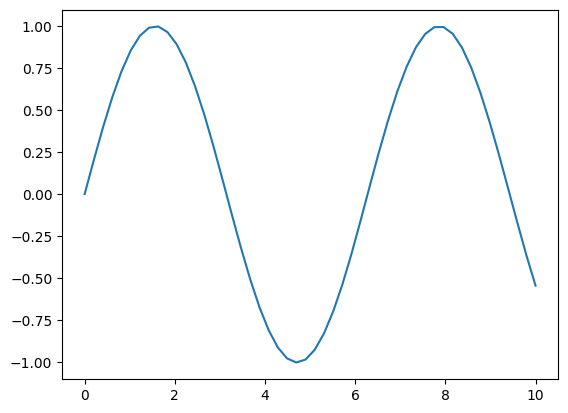

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def dydt(t,y):
    return np.cos(t) # функция для расчёта правой части: y'=cos(t)

t = np.linspace(0,10)
sol = solve_ivp(dydt, t_span=[0, max(t)], y0=[0] ,t_eval=t)
plt.plot(sol.t, sol.y[0])

Здесь 
* `solve_ivp` - функция модуля `scipy.integrate` для решения ОДУ,
* `dydt` - ваша функция, возвращающая правую часть уравнения,
* `t_span` - промежуток времени для решения,
* `y0` - начальное условие,
* `t_eval` - набор точек во времени, для которых будут рассчитаны значения $y$,
* `sol` - хранилище для полученного решения с полями `sol.t` - (времена, совпадают с предоставленным списком `t_eval`) и `sol.y` (значения искомой функции в эти моменты времени).

Как видите, для графика решения используется элемент списка `sol.y[0]`. Такая запись даёт надежду, что будут и другие элементы: `sol.y[1]`, которые могли бы пригодиться при решении системы уравнений. Действительно, так и будет.


### Решение системы уравнений и ОДУ более высокого порядка

Таким же способом можно решать систему ОДУ.
Внутренняя логика алгоритма сохраняется.
Действительно, если посмотреть на формулу для метода Эйлера,
в ней достаточно заменить сложение чисел на сложение векторов.

И такой же подход годится для случая более высоких производных.

### Пример 2. Синус, решение ОДУ 2-го порядка

Синус также можно получить решением уравнения второго порядка:

\begin{eqnarray}
\begin{cases}
y'' = - y
\\
y(0) = 0
\\
y'(0) = 1
\end{cases}
\end{eqnarray}

Используем стандартный приём из теории ОДУ: превратим уравнение 2-го порядка в два уравнения 1-го порядка, обозначив производную $y'(t)$ как новую величину $z(t)$:

\begin{eqnarray}
\begin{cases}
y' = z
\\
z' = -y
\\
y(0) = 0
\\
z(0) = 1
\end{cases}
\end{eqnarray}

Свели задачу к предыдущей.

Запишем функцию для правой части - теперь это список из двух производных для соответствующих функций:

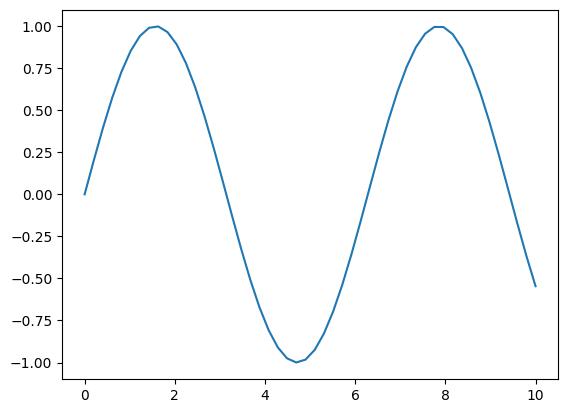

In [ ]:
def R2(t,yz):
    y = yz[0]
    z = yz[1]
    return [z, -y] # т.е. y'=z, z'=-y

t = np.linspace(0,10)
sol = solve_ivp(R2, t_span=[0, max(t)], y0=[0,1] ,t_eval=t)
plt.plot(sol.t, sol.y[0])

Здесь
* `R2` -- ваша функция, определяющая правую часть уравнения,
* `y0=[0,1]` -- начальное условие, список из двух значений для $y(0)$ и $y'(0)$.

#### Примечание о порядке аргументов у функции правой части $f(t,y)$

<i> Обратите внимание на порядок следования аргументов для функции правой части:
сначала время $t$, потом искомые функции (одна или несколько). Эту систему можно запомнить по следующей логике: правая часть может зависеть, прежде всего, от времени, поэтому оно идёт первым аргументом. Также правая часть может зависеть от искомых функций, но их число может быть разным, поэтому они добавлены следующими по списку.</i>

<i>В другом варианте решателя, который называется `odeint` (аббревиатура от "ODE integrate"), порядок аргументов у функции обратный, см. документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
Впрочем, `odeint`  устарел и не рекомендуется для использования.</i>

### Некоторые дополнительные параметры `solve_ivp`
(см. [документацию](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html))
* `t_eval` - набор времен для расчёта можно не указывать, тогда алгоритм сам выберет значения.
* `rtol`, `atol` - настройки допустимой погрешности (от английского "tolerance") соответственно "relative" (относительная) и "absolute" (абсолютная). 

Проверим, как влияют эти настройки: нарисуем истинный синус и решение с невысокой tolerance: $3\cdot10^{-2}$.
Как видно, решение начинает заметно отходить от ожидаемых значений. (Эта настройка нам ещё пригодится на следующем занятии.)

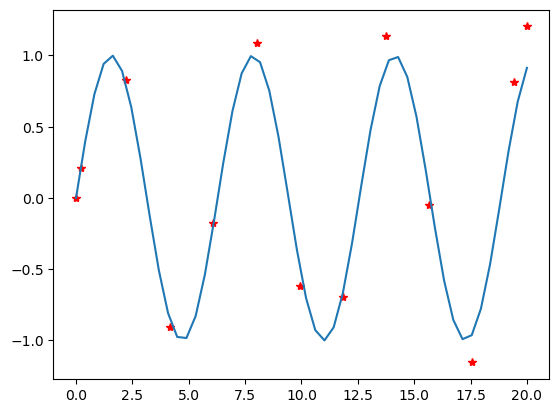

In [ ]:
t = np.linspace(0,20)
sol = solve_ivp(R2, t_span=[0, max(t)], y0=[0,1] ,atol=3e-2)
plt.plot(sol.t, sol.y[0], 'r*')
plt.plot(t, np.sin(t))


## Как строить графики

Основные составляющие любого графика изображены на рисунке ниже (с оригиналом можно ознакомиться [здесь](https://matplotlib.org/stable/tutorials/introductory/usage.html)). 

Здесь синим курсивом обозначены названия элементов, а черным прямым шрифтом -- их имена, по которым пользователь может к ним обращаться.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Функция </th>
    <td class="tg-7btt">Возможные <br> параметры</td>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>

  <tr>
    <td class="tg-0lax">plt.legend()</td>
    <td class="tg-0lax" rowspan="4">размер шрифта (`fontsize`) <br> начертание шрифта (`fontweight`) <br> стиль шрифта (`fontstyle`) <br> название шрифта (`fontname`) <br> цвет текста (`color`) </td>
    <td class="tg-0lax">Легенда</td>
  </tr>
  <tr>
    <td class="tg-0lax">plt.title('Chart title')</td>
    <td class="tg-0lax">Название графика</td>
  </tr>
  <tr>
    <td class="tg-0lax">plt.xlabel('x axis name', fontsize=16.)</td>
    <td class="tg-0lax">Подпись оси х</td>
  </tr>
  <tr>
    <td class="tg-0lax">plt.ylabel('у axis name', fontsize=16.)</td>
    <td class="tg-0lax">Подпись оси у</td>
  </tr>  
  <tr>
    <td class="tg-0pky">plt.xlim(1.5, 1.8)</td>
    <td class="tg-0pky" rowspan="2">Диапазон значений</td>      
    <td class="tg-0pky">Границы оси х</td>
  </tr> 
  <tr>
    <td class="tg-0pky">plt.ylim(0, 30)</td>    
    <td class="tg-0pky">Границы оси у</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.rc('text', usetex=True)</td>
    <td class="tg-0pky"></td>      
    <td class="tg-0pky">Разрешение использовать разметку Latex</td>
  </tr>
   <tr>
    <td class="tg-0pky" rowspan="4">plt.grid()</td>
    <td class="tg-c3ow">Показывать или нет (`visible` -- принимает True или False)</td>
    <td class="tg-0pky" rowspan="4">Создание сетки</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Какую сетку показывать (`which` -- принимает "major", "minor", "both")</td>
  </tr>
  <tr>
    <td class="tg-c3ow">По какой оси показывать (`axis` -- принимает "x", "y", "both")</td>
  </tr>
  <tr>
    <td class="tg-c3ow">`**kwargs` -- параметры линий сетки (цвет, толщина, начертание и т.д. Подробнее см. в документации к `plt.grid()`)</td>
  </tr>        
    
</tbody>
</table>


<img src="https://matplotlib.org/stable/_images/anatomy.png" width="700" height="700" />



### Основные команды работы с графиками


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Функция </th>
    <th class="tg-7btt">Основные параметры</th>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">plt.plot(x, y, *параметры*)</td>
    <td class="tg-c3ow">Данные (`x`, `y`) <br> Цвет линии (`color` или `c`) <br> Толщина линии (`linewidth` или `lw`) <br> Тип линии (`linestyle` или `ls` ) <br> Маркер (`marker`) <br> Метка графика (`label`) </td>
    <td class="tg-0pky">Построение простого линейного графика</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.show()</td>
    <td class="tg-c3ow"></td>
    <td class="tg-0pky">Вывод графика на экран (отдельное окно)</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.scatter(x, y)</td>
    <td class="tg-c3ow">Данные (`x`, `y`) <br> Размер маркера (`size` или `s`) <br> Цвет маркера (`color` или `c`) <br> Цвет контура маркера (`edgecolors`) <br> Форма маркера (`marker`) <br> Метка графика (`label`) </td>
    <td class="tg-0pky">Точечная диаграмма</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="3">plt.savefig('plot.FMT')</td>
    <td class="tg-c3ow">png</td>
    <td class="tg-0pky" rowspan="3">Сохранить как изображение в формате FMT</td>
  </tr>
  <tr>
    <td class="tg-c3ow">pdf</td>
  </tr>
  <tr>
    <td class="tg-c3ow">eps</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.subplots()</td>
    <td class="tg-c3ow">Число рядов (`nrows`) <br>Число столбцов (`ncols`)</td>
    <td class="tg-0pky">Создает фигуру и сетку подграфиков одним вызовом</td 
  </tr>

</tbody>
</table>

### Способы расположения легенды на графике (параметр ```loc=LINE```)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Значение LINE (строка) </th>
    <th class="tg-7btt">Значение LINE (целое число) </th>
    <th class="tg-7btt">Значение LINE (строка) </th>
    <th class="tg-7btt">Значение LINE (целое число) </th>  
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">'best'</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">'center left'</td>
    <td class="tg-0pky">6</td>      
  </tr>
  <tr>
    <td class="tg-0pky">'upper right'</td>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">'center right'</td>
    <td class="tg-0pky">7</td>      
  </tr>
  <tr>
    <td class="tg-0pky">'upper left'</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">'lower center'</td>
    <td class="tg-0pky">8</td>      
  </tr>
  <tr>
    <td class="tg-0pky">'lower left'</td>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">'upper center</td>
    <td class="tg-0pky">9</td>      
  </tr> 
  <tr>
    <td class="tg-0pky">"lower right"</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">"center"</td>
    <td class="tg-0pky">10</td>      
  </tr> 
  <tr>
    <td class="tg-0pky">'right'</td>
    <td class="tg-0pky">5</td>
  </tr>

</tbody>
</table>

### Полезные параметры команды ```plt.plot()``` на двух примерах

1. ```plt.plot(x, y, color='r', linestyle=':', linewidth=4., marker='o')```

2. ```plt.plot(year , np.log10(ntrans), '*', markersize=12, color='r', markeredgecolor='r', label='observed')```

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Параметр </th>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">color</td>
    <td class="tg-0pky">Цвет линии графика</td>
  </tr>
  <tr>
    <td class="tg-0pky">linestyle</td>
    <td class="tg-0pky">Стиль линии</td>
  </tr>
  <tr>
    <td class="tg-0pky">linewidth</td>
    <td class="tg-0pky">Толщина линии</td>
  </tr>
  <tr>
    <td class="tg-0pky">'*' (маркер)</td>
    <td class="tg-0pky">Обозначение точек на графике</td>
  </tr> 
  <tr>
    <td class="tg-0pky">markersize</td>
    <td class="tg-0pky">Размер маркера</td>
  </tr> 
  <tr>
    <td class="tg-0pky">markeredgecolor</td>
    <td class="tg-0pky">Цвет контура маркера</td>
  </tr>
  <tr>
    <td class="tg-0pky">label='label'</td>
    <td class="tg-0pky">Метка графика в легенду</td>
  </tr>

</tbody>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
    
  <tr>
    <th class="tg-amwm" colspan="3">Маркеры точек </th>
    <th class="tg-amwm" colspan="2">Цвета линий/маркеров</th>
    <th class="tg-amwm" colspan="2">Стили линий</th>
  </tr>
      <tr>
    <th class="tg-amwm" colspan="3"></th>
    <th class="tg-amwm" colspan="2">color</th>
    <th class="tg-amwm" colspan="2">linestyle</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-amwm">Код</td>
    <td class="tg-amwm">Маркер</td>
    <td class="tg-amwm">Описание</td>
    <td class="tg-amwm">Коды основных цветов</td>
    <td class="tg-amwm">Живые (Tableau) цвета</td>
    <td class="tg-amwm">Код</td>
    <td class="tg-amwm">Стиль линии</td>
  </tr>
  <tr>
    <td class="tg-baqh">.</td>
    <td class="tg-baqh">∙</td>
    <td class="tg-0lax">Точка</td>
    <td class="tg-0lax">b = синий</td>
    <td class="tg-0lax">tab:blue</td>
    <td class="tg-baqh">-</td>
    <td class="tg-0lax">Сплошная</td>
  </tr>
  <tr>
    <td class="tg-baqh">o</td>
    <td class="tg-baqh">○</td>
    <td class="tg-0lax">Кружок</td>
    <td class="tg-0lax">g = зеленый</td>
    <td class="tg-0lax">tab:green</td>
    <td class="tg-baqh">--</td>
    <td class="tg-0lax">Штриховая</td>
  </tr>
  <tr>
    <td class="tg-baqh">+</td>
    <td class="tg-baqh">+</td>
    <td class="tg-0lax">Знак плюс</td>
    <td class="tg-0lax">r = красный</td>
    <td class="tg-0lax">tab:red</td>
    <td class="tg-baqh">:</td>
    <td class="tg-0lax">Пунктирная</td>
  </tr>
  <tr>
    <td class="tg-baqh">x</td>
    <td class="tg-baqh">×</td>
    <td class="tg-0lax">Крестик</td>
    <td class="tg-0lax">m = фиолетовый</td>
    <td class="tg-0lax">tab:purple</td>
    <td class="tg-baqh">-.</td>
    <td class="tg-0lax">Штрихпунктирная</td>
  </tr>
  <tr>
    <td class="tg-baqh">D</td>
    <td class="tg-baqh">⋄</td>
    <td class="tg-0lax">Ромбик</td>
    <td class="tg-0lax">c = бирюзовый</td>
    <td class="tg-0lax">tab:olive</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">v</td>
    <td class="tg-baqh">∇</td>
    <td class="tg-0lax">Треугольник с вершиной вниз</td>
    <td class="tg-0lax">y = желтый</td>
    <td class="tg-0lax">tab:orange</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">^</td>
    <td class="tg-baqh">∆</td>
    <td class="tg-0lax">Треугольник с вершиной вверх</td>
    <td class="tg-0lax">k = черный</td>
    <td class="tg-0lax">tab:gray</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">s</td>
    <td class="tg-baqh">□</td>
    <td class="tg-0lax">Квадратик</td>
    <td class="tg-0lax">w = белый</td>
    <td class="tg-0lax">tab:brown</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">*</td>
    <td class="tg-baqh">★</td>
    <td class="tg-0lax">Звездочка</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">tab:pink</td>
    <td class="tg-0lax"></td>
  </tr>
 <tr>
 <tr>
    <td class="tg-baqh"></td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">tab:cyan</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>

</tbody>
</table>

А еще в ```matplotlib``` встроено некоторое количество "названных" цветов (например, salmon, darkseagreen, indigo, и т. д.). Полный список можно найти [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html).

**N.B.:** Первый (1) вариант нарисует линию с маркерами в каждой точке. Второй (2) вариант нарисует только маркеры в виде звездочек без соединительных линий.

### Создание полярных графиков

Распространенным вариантом графиков подобного рода являются полярные графики, задаваемые как

~~~
x = f(r, phi)
y = g(r, phi)
~~~

где `(x, y)` -- декартовы координаты точки на плоскости, а `(r, phi)` -- координаты точки в полярных координатах, причём `r = r(phi)`. Примером полярного график являются диаграммы направленности, определяющие интенсивность излучения, испускаемого в определенный телесный угол (диаграмма направленности излучения Черенкова, диаграммы вторичной эмиссии электронов и др.).

Для построения полярного графика можно использовать функцию `polar`. Пример её использования для построения графиков логарифмической спирали и кардиоды -- ниже:

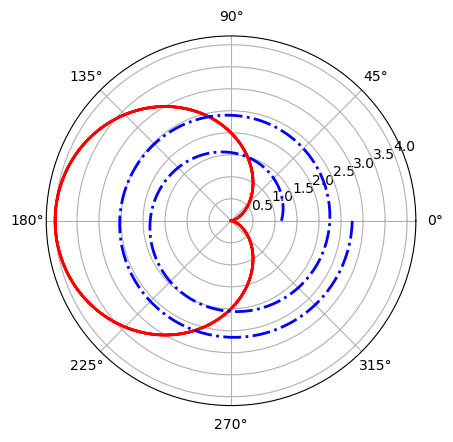

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# определим набор отсчётов по полярному углу
phi = np.linspace(0, 4.*np.pi, 200)
# определим набор отсчётов по r, определяющих кардиоду...
r = 2.0*(1.0 - np.cos(phi))
# и логарифмической спирали
s = np.log(phi + np.pi)

# теперь строим график
plt.polar(phi, r, linewidth=2.0, color='r', linestyle='-')
plt.polar(phi, s, linewidth=2.0, color='b', linestyle='-.')


##### Тепловые карты
Другим средством двумерного представления трёхмерных данных является использование тепловых карт.

*Тепловая карта* - график на плоскости, в котором для представления значения функции используется цвет, так что точки на плоскости, отвечающие условию f(x,y) = const, окрашены одинаковым образом.

Главное отличие тепловой карты от контурной - в непрерывности представления данных. Тепловая карта может быть получена из контурной закрашиванием пространства между двумя соседними линиями уровня.

Для отрисовки тепловой карты используется функция `contourf`. Синтаксис и пример приведены ниже.

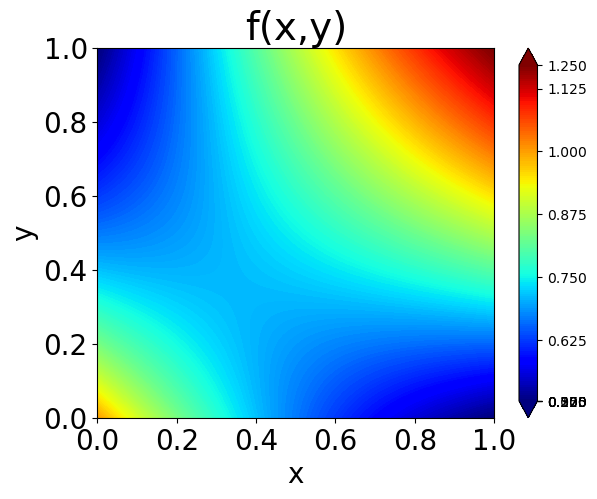

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# задача - в квадрате [0; 1]x[0; 1] построить тепловую карту
# для функции f(x,y) = 1/(x + y - 1) + sin(xy)

# задаём диапазоны изменения параметров x и y
x = np.linspace(0, 1., 100)
y = np.linspace(0, 1., 100)

# готовим двумерную сетку координат и...
X, Y = np.meshgrid(x, y)  # функция преобразует одномерные массивы в двумерную сетку
# ... значения искомой функции
f = 1./(X + Y + 1) + np.sin(X*Y)

# теперь строим карту - обратите внимание на вызов contourf
ptr = plt.contourf(X, Y, f, cmap=plt.cm.jet, levels=200, extend='both')
# cmap - цветовая схема для отрисовки линий уровня
# levels - число эквипотенциалей (можно задать массив значений f, на которых должны быть заданы линии уровня) для построения карты
# extend - необязательный параметр, указывающий необходимость расширения значений на цветовой шкале значений
# цвет в уголке на конце шкалы отмечает все значения функции f, выходящие за предельные значения на цветовой шкале

# вместо подписей для линий уровня при построении тепловой карты строится цветовая шкала
plt.colorbar(ptr, ticks=[i for i in np.linspace(0., 1.25, 11)])

# добавим подписи к осям и принудительно отрисуем объекты на холсте
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('f(x,y)', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# список параметров, которые можно передать в функцию, почти аналогичен функции contour и может быть найден по адресу
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf
# синтаксис построения цветовой шкалы - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar


### Представление нескольких графиков в одном окне
При решении практических задач могут возникать ситуации, когда в одном окне должны быть построены разнородные данные, например временная развертка сигнала и его частотный спектр, выполнить которую на одном графике невозможно.

В этом случае необходимо создание нескольких полотен, каждое из которых будет использовано для построения своего набора данных.

Основная функция, которая используется для создания нескольких полотен, - `subplots`.

Пример организации данных - ниже.

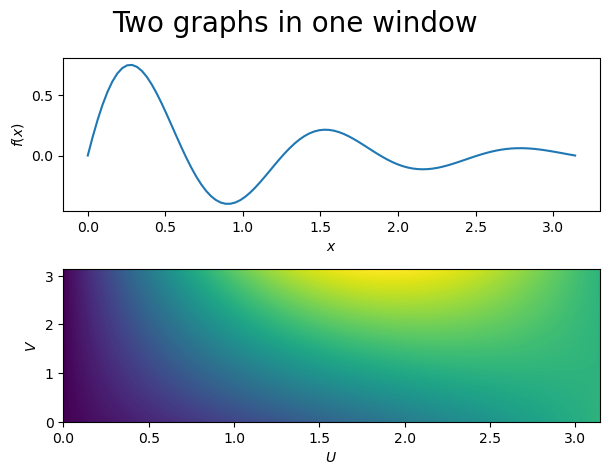

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# построим в одном окне два графика:
# один - обычный двумерный, второй - тепловая карта

# данные для первого графика функции f(x) = sin(5x)*exp(-x)
x = np.linspace(0., np.pi, 100)
y = np.sin(5.0*x)*np.exp(-x)

# данные для второго графика g(u,v) = u + v*sin(u)
u = np.linspace(0., np.pi, 100)
v = np.linspace(0., np.pi, 100)
U, V = np.meshgrid(u, v)
g = U + V*np.sin(U)

# теперь построим графики
# сначала разметим окно на две области в вертикальном направлении и 1 - в горизонтальном
fig, ax = plt.subplots(nrows=2, ncols=1)

# для обращения к канве используем параметр ax (список, хранящий указатели на
# каждый из холстов) и построим график f(x) на первом холсте
ax[0].plot(x, y)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

# теперь - график r(phi)
ax[1].contourf(U, V, g, levels=200)
ax[1].set_xlabel(r'$U$')
ax[1].set_ylabel(r'$V$')

# теперь оптимизируем расстояния между холстами, используя встроенную функцию
# tight_layout из модуля matplotlib, и добавим общее название графика
plt.suptitle(r'Two graphs in one window', fontsize=20)
plt.tight_layout()


## Домашнее задание

Исследовать поведение системы уравнений:

\begin{eqnarray}
\begin{cases}
r' = (r^2 - 1) \sin \varphi,
\\
\varphi' = (3 r^2 - 1) \cos \varphi
\end{cases}
\end{eqnarray}

\begin{eqnarray}
0 <= r <= 1
\end{eqnarray}
Построить несколько траекторий в координатах ($r$, $\varphi$). Исследовать поведение периода колебаний в зависимости от начальных условий.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
def R3(t, rphi):
    r = rphi[0]
    phi = rphi[1]
    return [(pow(r, 2) - 1) * np.sin(phi),  (3 * pow(r, 2) - 1) * np.cos(phi)]

In [3]:
def R4(phi, r):
    return (r**2 - 1)/(3 * r**2 - 1) * np.tan(phi)

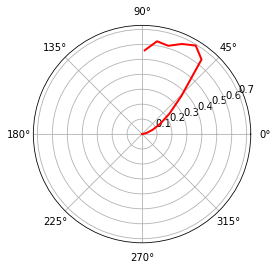

In [4]:
psi = np.linspace(0, 2 * np.pi)
sol = solve_ivp(R4, t_span=[0, max(psi)], y0=[0] ,t_eval=psi)

plt.polar(sol.t, sol.y[0], linewidth=2.0, color='r', linestyle='-')

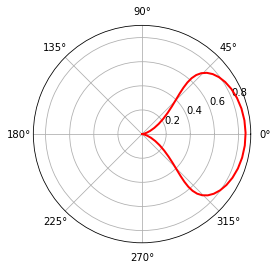

In [5]:
t = np.linspace(0,5)
sol = solve_ivp(R3, t_span=[0, max(t)], y0=[0, 0] ,t_eval=t)

r = sol.y[0]
phi = sol.y[1]

plt.polar(phi, r, linewidth=2.0, color='r', linestyle='-')

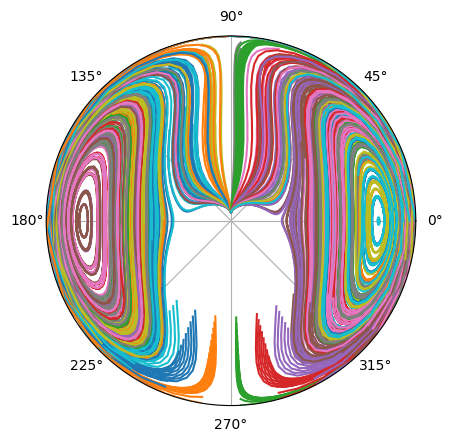

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(polar=True)
t = np.linspace(0, 10)
# Проварьируем началные данные
for r0 in np.linspace(0, 1, 15):
    for phi0 in np.linspace(0, 2 * np.pi, 30):
        sol = solve_ivp(R3, t_span=[0, max(t)], y0=[r0, phi0] ,t_eval=t)
        r = sol.y[0]
        phi = sol.y[1]
        ax.plot(phi, r)
        ax.set_rmax(1)
        ax.set_rticks([])

Text(0.5, 1.0, 'цветочек синенький')

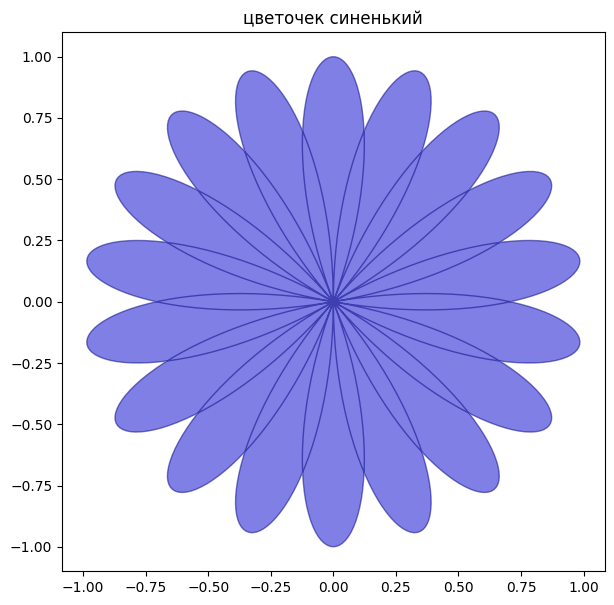

In [ ]:
plt.figure(figsize=(7,7))
theta = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
k = 9/2
x = np.cos(k*theta)*np.sin(theta)
y = np.cos(k*theta)*np.cos(theta)
plt.fill(x, y, edgecolor='navy', facecolor='mediumblue', alpha=0.5)
plt.title('цветочек синенький')